# **House Price Prediction**

## Goal:
To predict house prices based on various features such as size, number of bedrooms, location, and other factors.

# Importing Libraries

In [36]:
# Step 1: Import Libraries
import pandas as pd 
# for data manupulation. DataFrame and series for handling data.
import numpy as np
# numerical computation. Large and complex model. multi dimensional array and mathematical operation
import matplotlib.pyplot as plt
# for attractive graphs for data visualisation.
import seaborn as sns
# top of matplotlib. Statistical data visualization for better aesthetics.
from sklearn.model_selection import train_test_split, cross_val_score
# Splits data in training and testing data. Model's performance on unseen data and preventing from overfitting. 
# Cross-validation by splitting dataset multiple times and calculating avg score.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Predicts continous values based on independent features. Linear relation (i/p and target var)
# Ridge: Regularized version of LinearRegression. L2 regularization for penelazing large coefficient.
# Lasso: Similar to Ridge. L1 regularization, eliminiate insignificant features.
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
# Standardize numerical features by converting mean=0,sd=1.
# Geenerate high degree polynomial features to capture nonlinear relationship. Used in Polynomial Regression.
# Converts categorical labels into numerical values.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# MAE: avg ab. diff between actual and predicted values. Less sensitive to outliers than MSE.
# MSE: avg sq. diff bet actual and pred values. Penalises larger errors more than MAE.
# R2: How well the model explains the variance in the dependent variable.
import joblib

# Loading Dataset

In [37]:
# Step 2: Load Dataset

df = pd.read_csv("D:\DATASETS\india_housing_prices.csv")
df.head() # shows all the features of dataset with top 5 entries.



<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\comp\AppData\Local\Temp\ipykernel_16272\937968561.py:3: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\DATASETS\india_housing_prices.csv")


,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


# Data Preprocessing 

In [38]:
#checking structure and summary

df.info() # gives information of dtypes of features(Not-Null, Count, Dtype)

df.describe() # gives statistical analysis of numerical features (count,mean,sd,count,min,25%,50%,75%,max) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              250000 non-null  int64  
 1   State                           250000 non-null  object 
 2   City                            250000 non-null  object 
 3   Locality                        250000 non-null  object 
 4   Property_Type                   250000 non-null  object 
 5   BHK                             250000 non-null  int64  
 6   Size_in_SqFt                    250000 non-null  int64  
 7   Price_in_Lakhs                  250000 non-null  float64
 8   Price_per_SqFt                  250000 non-null  float64
 9   Year_Built                      250000 non-null  int64  
 10  Furnished_Status                250000 non-null  object 
 11  Floor_No                        250000 non-null  int64  
 12  Total_Floors    

,ID,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,125000.500000,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,72168.927986,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,62500.750000,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,125000.500000,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,187500.250000,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,250000.000000,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [39]:
print(df.columns)


Index(['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type',
       'Availability_Status'],
      dtype='object')


In [40]:
#checking for missing values
df.isnull().sum()

ID                                0
State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

No null values are present in any of the above features

# Encoding Categorical Values ( Label Encoding )

1. Label Encoding converts categorical values into numerical values by assigning a unique integer to each category.
2. Good for Random Forest, XGBoost which handles categorical values natively.
3. Saves memory as it replaces string with integer instead of creating columns for each category seperately.
4. One-Hot Encoding creates a unique column for each category. Not suitable for High dimensions, Inefficient for Tree Based Models. More memory usage also.

In [41]:
# Create a LabelEncoder object
'''
label_encoder = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:\n", categorical_cols)

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])'''


categorical_cols = ['Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
                    'Furnished_Status', 'Property_Type', 'City', 'Locality', 'Parking_Space',
                    'Security', 'Facing', 'Owner_Type', 'Availability_Status', 'State', 'Amenities']


encoders = {}
# categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

joblib.dump(encoders, "C:\\Users\\comp\\OneDrive\\Desktop\\HOUSI\\model_files\\encoders.pkl")

['C:\\Users\\comp\\OneDrive\\Desktop\\HOUSI\\model_files\\encoders.pkl']

In [42]:
df

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,15,6,483,0,1,4740,489.76,0.10,1990,...,35,9,2,0,0,0,238,3,2,0
1,2,11,33,434,1,3,2364,195.52,0.08,2008,...,17,7,0,1,0,1,211,1,1,1
2,3,13,25,75,0,2,3642,183.79,0.05,1997,...,28,8,7,1,1,0,63,2,0,0
3,4,14,21,326,1,2,2741,300.29,0.11,1991,...,34,4,6,0,1,1,206,1,1,0
4,5,14,19,407,2,4,4823,182.90,0.04,2002,...,23,3,8,1,0,1,222,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,249996,5,0,97,1,5,1995,274.75,0.14,1995,...,30,7,5,1,0,0,220,0,0,1
249996,249997,15,6,276,0,1,2293,13.40,0.01,2013,...,12,7,9,1,0,0,195,2,0,0
249997,249998,16,41,140,2,4,2910,236.94,0.08,2003,...,22,9,3,0,1,1,195,2,1,1
249998,249999,12,8,43,2,1,1149,141.66,0.12,2007,...,18,2,6,1,1,1,239,2,2,0


# Heatmap for Correlation of Features

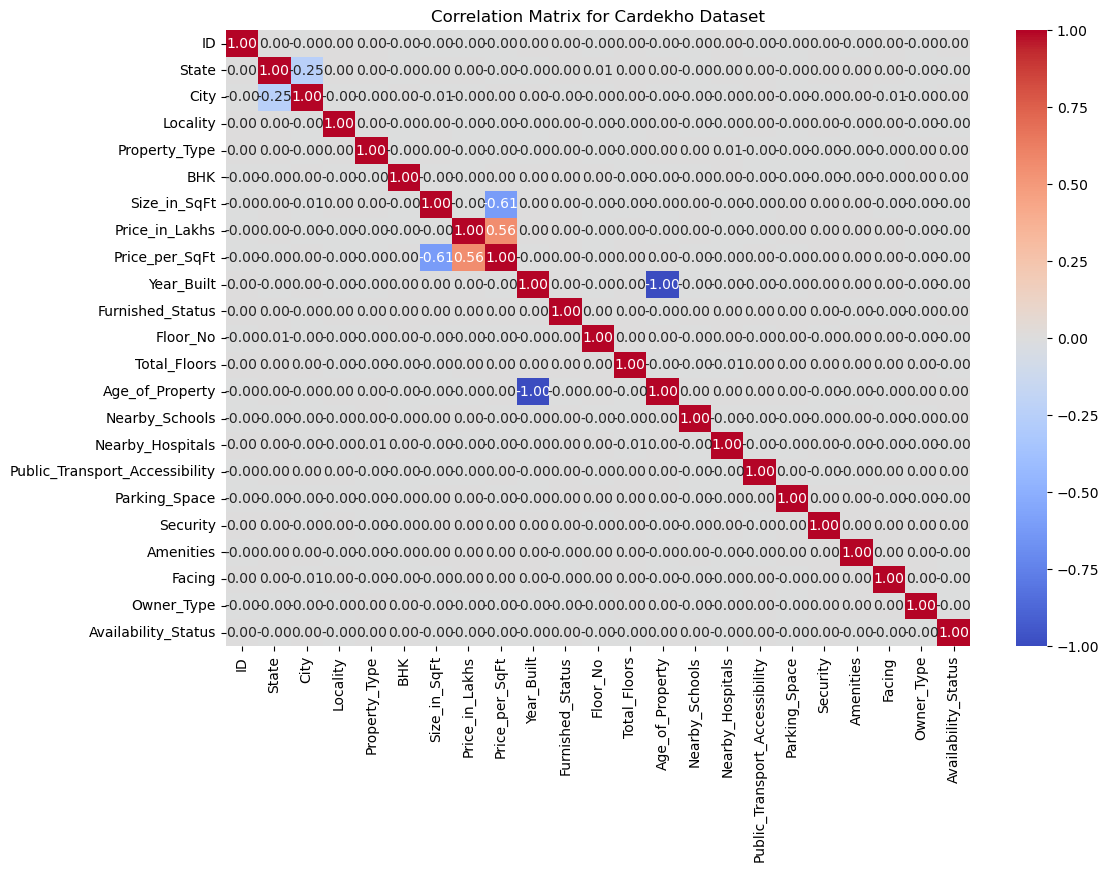

In [43]:
# Select only the numeric columns for correlation calculation
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns
corr_matrix = numeric_data.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Cardekho Dataset')
plt.show()

Price_per_Sqft is highly correlated with the target variable Price_in_Lakhs i.e 0.57

# Feature Scaling

Scaling all the numerical features into the same scale for the models better efficiency and performance.

# Feature Selection and Train Test Split 

Multiple Linear Regression. Taking all the independent variables except the target variable(Price_in_Lakhs)

In [44]:
#train_test_split
X = df.drop('Price_in_Lakhs', axis = 1)

y = df['Price_in_Lakhs']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [45]:
#feature scaling

scaler = StandardScaler()

'''df[['State','City', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing','Owner_Type','Availability_Status']] = scaler.fit_transform(df[['State','City', 'Property_Type', 'BHK',
       'Size_in_SqFt', 'Price_per_SqFt', 'Year_Built',
       'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property',
       'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Amenities', 'Facing','Owner_Type','Availability_Status']])'''

# OR we can do otherwise by taking all columns

X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
#Building multiple linear regression
multiple_model = LinearRegression()
multiple_model.fit(X_train_scaled, y_train)

LinearRegression()

# Model's Metrics

Evaluating model's performance based on the MAE, MSE, R2 error values 

In [47]:
# Evaluate multiple regression
y_pred_multiple = multiple_model.predict(X_test_scaled)
print("Multiple Linear Regression R^2:", r2_score(y_test, y_pred_multiple))
print("MAE:", mean_absolute_error(y_test, y_pred_multiple))
print("MSE:",mean_squared_error(y_test,y_pred_multiple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_multiple)))

Multiple Linear Regression R^2: 0.49015447954534797
MAE: 81.14051071408801
MSE: 10164.028196406323
RMSE: 100.81680512893831


1. R2(Coefficient of Determinant): 49.4% indicating that half of the variability of house_price is explained by the model. Needs more improvement

2. MAE: avg abs diff betn actual and predicted. apprx 80.9 Lakh(quite high). Significance error in price prediction

3. MSE: avg sq diff betn actual and predicted. Large errros get amplified, indicating poor model's performance.(Difficult to interpret)

4. RMSE: Prediction deviate by 100.58 Lakh on avg. RMSE close to MAE suggets that some large error exists, but not extreme outliers.

# Possible Reasons for Model's Performance

1. Features are Not Sufficiently Predictive. Some features have low correlation with the target variable(Price_in_Lakhs).
2. Multicollinearity between features. Some highly correlated features may distort the regression model.
3. Presence of Outliers. Outliers can mislead the regression model.
4. Non-Linear Relationships: Multiple Linear Regression assumes linear relationship between features and price. Try using Polynomial Regression.
5. Poor data preprocessing.
6. Better Model requirement(Random Forest, XGBoost)

# Ridge and Lasso Regularizations.

1. MLR struggles with Multicollinearity(independent features are highly correlated). Ridge and Lasso penalizing(shrinks) large coefficient, reducing overfitting.
2. MLR sensitive to outliers. Ridge and Lasso prevent large weights on extreme values.
3. MLR does not perform feature selection, whereas Lasso can automatically remove the irrelevant features.(Ridge cannot remove).

Polynomial Regression with Ridge and Lasso Regularization to improve model's performance

# Feature Engineering - Polynomial Feature

In [48]:
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias = False)
# Generates polynomial features(squared terms, interactions)
# degree=2. adds squared terms(x2) and interaction(x1x2,x2x3,..)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
# Helps in capturing non-linear relationships between features and target variable

# RIDGE REGRESSION
# L2 regularization: Adds penalty for large coefficients, preventing overfitting
# Helps in Features are highly correlated.(multicollinearity)
ridge = Ridge(alpha= 1.0)
# Alpha controls penalty
# High alpha: More regularization(simplifies model, may underfit)
# Lower alph: Less regularization(closer to MLR)
ridge.fit(X_train_poly, y_train)
y_pred_ridge = ridge.predict(X_test_poly)
print("Ridge Regression R^2:", r2_score(y_test, y_pred_ridge))

# LASSO REGRESSION
# L1 regularization: Not only shrinks but can eliminate the unnecessary features
# If many features are insignificant, Lasso will remove them, making model simpler
lasso = Lasso(alpha=0.01)
# High alpha: More features are removed(risk to underfitting)
# Lower alpha: Keeps more features(closer to Ridge)
lasso.fit(X_train_poly, y_train)
y_pred_lasso = lasso.predict(X_test_poly)
print("Lasso Regression R^2:", r2_score(y_test, y_pred_lasso))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.06148e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge Regression R^2: 0.9960706470760123
Lasso Regression R^2: 0.996063657017343


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.774e+06, tolerance: 3.998e+05
  model = cd_fast.enet_coordinate_descent(


1. Better R2 value from Ridge and Lasso 99.61%(closer to 1) indicating the model explains 99.61% variance in Price_in_Lakhs.
2. Potential Overfitting:A very high R², especially close to 1.0, can indicate overfitting—the model may be memorizing the training data instead of generalizing well.

# Compare train R2 vs test R2

In [49]:
print("Train R^2 (Ridge):", ridge.score(X_train_poly, y_train))
print("Test R^2 (Ridge):", ridge.score(X_test_poly, y_test))


Train R^2 (Ridge): 0.9961307159197609
Test R^2 (Ridge): 0.9960706470760123


Train R2 is not higher than Test R2. Preventing overfitting

# Plotting Graph

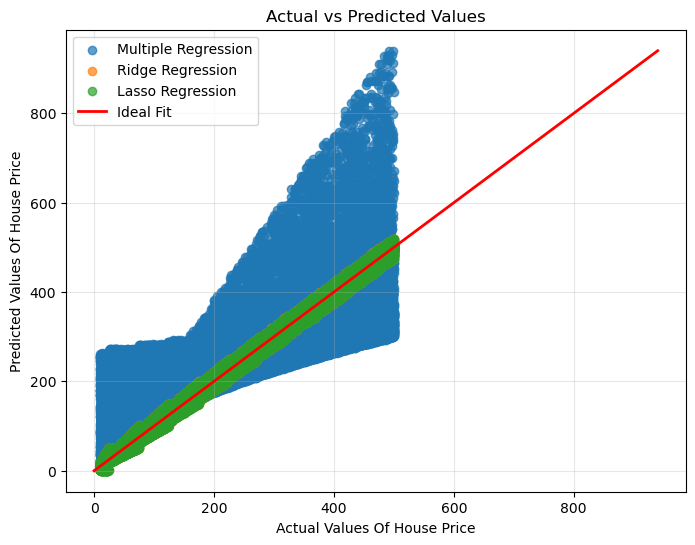

In [50]:
# Adjust the Ideal Fit Line to Extend Fully
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multiple, label='Multiple Regression', alpha=0.7)
plt.scatter(y_test, y_pred_ridge, label='Ridge Regression', alpha=0.7)
plt.scatter(y_test, y_pred_lasso, label='Lasso Regression', alpha=0.7)

# Extend the ideal fit line across the full range of the plot
min_val = min(y_test.min(), y_pred_multiple.min(), y_pred_ridge.min(), y_pred_lasso.min())
max_val = max(y_test.max(), y_pred_multiple.max(), y_pred_ridge.max(), y_pred_lasso.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal Fit', linewidth=2)

# Add titles, labels, and legend
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values Of House Price")
plt.ylabel("Predicted Values Of House Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# INSIGHTS

1. Using MLR the Data Points are spreaded more, showing more deviations of predicted House Price values from actual House Price values. For Lower Prices it predicts reasonably ok, but for higher prices, it underestimates, meaning the model strugles to capture the expensive properties accurately.

2. Lasso Provides an excellent Prediction. All the greeen dots are alligned closer to the ideal fit red line (Actual=Predicted).
Indicated that polynomial feature transfromation + Ridge/Lasso regularization helped improve model accuracy.

4. No data points beyond 600. Original dataset may not contain house price above 600 lakh.

3. StandardScaler(Mean=0,SD=1). All price converted to standardized z-score. Ensuring correct scaling.

In [51]:
cross_val_score(ridge, X_train_poly, y_train, cv=5)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.32933e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.48379e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.3728e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=1.38061e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204

array([0.99616498, 0.99613907, 0.99610397, 0.99608436, 0.99610735])

## Saving Required Files

In [52]:
'''import joblib

# Save trained model (lasso or ridge)
joblib.dump(lasso, 'lasso_model.pkl')

# Save StandardScaler (scaler for numeric data)
joblib.dump(scaler, 'scaler.pkl')

# Save LabelEncoders dictionary (encoders for categorical columns)
joblib.dump(encoders, 'encoders.pkl')

# Save PolynomialFeatures transformer
joblib.dump(poly, 'poly_transformer.pkl')

# Save the list of selected features (column names used for training)
selected_features = list(X.columns)
joblib.dump(selected_features, 'selected_features.pkl')'''

import joblib
import os

# Step 1: Create a folder to store .pkl files (only if it doesn't exist)
save_dir = "model_files"
os.makedirs(save_dir, exist_ok=True)

# Step 2: Save each file inside that folder
joblib.dump(lasso, os.path.join(save_dir, 'lasso_model.pkl'))
joblib.dump(scaler, os.path.join(save_dir, 'scaler.pkl'))
#joblib.dump(encoders, os.path.join(save_dir, 'encoders.pkl'))
joblib.dump(poly, os.path.join(save_dir, 'poly_transformer.pkl'))

# Save selected features
selected_features = list(X.columns)
joblib.dump(selected_features, os.path.join(save_dir, 'selected_features.pkl'))

print(selected_features)

# Only keep features used in the model
# selected_features = [
#     'State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt',
#     'Year_Built', 'Parking_Space', 'Security', 'Amenities', 'Facing',
#     'Owner_Type', 'Availability_Status', 'Public_Transport_Accessibility',
#     'Age_of_Property', 'Nearby'
# ]

# joblib.dump(selected_features, 'model_files/selected_features.pkl')




['ID', 'State', 'City', 'Locality', 'Property_Type', 'BHK', 'Size_in_SqFt', 'Price_per_SqFt', 'Year_Built', 'Furnished_Status', 'Floor_No', 'Total_Floors', 'Age_of_Property', 'Nearby_Schools', 'Nearby_Hospitals', 'Public_Transport_Accessibility', 'Parking_Space', 'Security', 'Amenities', 'Facing', 'Owner_Type', 'Availability_Status']
